# Stack Overflow Analysis of WSL users 2022

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas

In [29]:
df=pandas.read_csv('Data/survey_results_public.csv')

## Personal vs Professional use comparison

In [32]:

df['OpSysProfessional use']=df['OpSysProfessional use'].str.split(';')
df['OpSysPersonal use']=df['OpSysPersonal use'].str.split(';')
dfx=df.explode('OpSysProfessional use')
dfx=dfx.explode('OpSysPersonal use')
use_df=dfx['OpSysProfessional use'].value_counts().rename_axis('OpSys').reset_index(name='Professional')
per_df=dfx['OpSysPersonal use'].value_counts().rename_axis('OpSys').reset_index(name='Personal')
use_df=use_df.merge(per_df, how = 'left', on='OpSys')
use_df['Professional Percentage']=round(use_df['Professional']/len(df.index),2)
use_df['Personal Percentage']=round(use_df['Personal']/len(df.index),2)
use_df

,OpSys,Professional,Personal,Professional Percentage,Personal Percentage
0,Windows,55330,68805,0.76,0.94
1,Linux-based,48177,45837,0.66,0.63
2,macOS,38441,34545,0.52,0.47
3,Windows Subsystem for Linux (WSL),20837,21169,0.28,0.29
4,BSD,1702,2229,0.02,0.03
5,Other (please specify):,652,742,0.01,0.01


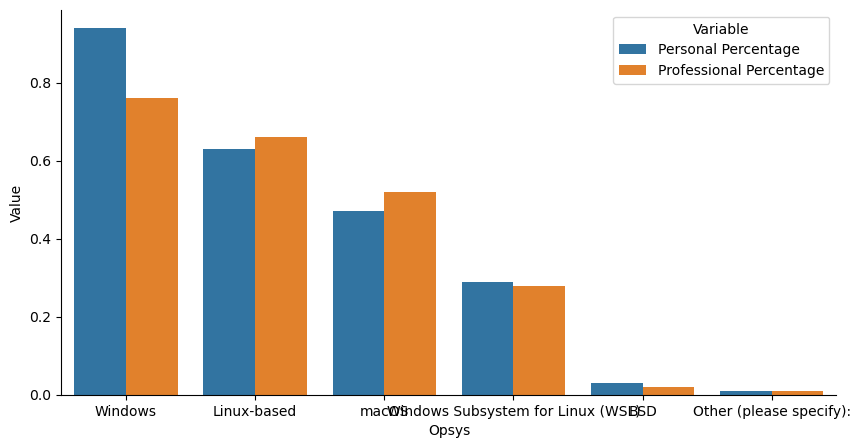

In [34]:
tidy_use=use_df[['OpSys','Personal Percentage','Professional Percentage']].melt(id_vars='OpSys').rename(columns=str.title)
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x='Opsys', y='Value', hue='Variable', data=tidy_use, ax=ax1)
sns.despine(fig)

## WSL Users by Job Role

In [37]:
wsldf = dfx[dfx['OpSysProfessional use']=='Windows Subsystem for Linux (WSL)']


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
10,11,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,60307.0
21,22,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Other (please specify):,NaN,NaN,5,...,30-60 minutes a day,60-120 minutes a day,Somewhat long,None of these,Yes,No,No,Appropriate in length,Easy,34126.0
29,30,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Fully remote,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow,NaN,27,...,15-30 minutes a day,15-30 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,Yes,Yes,Yes,Too long,Easy,1663644.0
48,49,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,40,...,15-30 minutes a day,Less than 15 minutes a day,Just right,Continuous integration (CI) and (more often) c...,Yes,No,Yes,Appropriate in length,Easy,106644.0
48,49,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,40,...,15-30 minutes a day,Less than 15 minutes a day,Just right,Continuous integration (CI) and (more often) c...,Yes,No,Yes,Appropriate in length,Easy,106644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73256,73257,I am a developer by profession,"Student, part-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,Coursera;Udemy,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
73256,73257,I am a developer by profession,"Student, part-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,Coursera;Udemy,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
73256,73257,I am a developer by profession,"Student, part-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,Coursera;Udemy,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
73261,73262,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Programming Game...,Udemy;Codecademy;Pluralsight,9,...,15-30 minutes a day,15-30 minutes a day,Somewhat long,Innersource initiative;DevOps function;Microse...,Yes,Yes,Yes,Appropriate in length,Easy,NaN
